In [6]:
from models.regex import RegexModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface

regex_m = RegexModel()
dataloader = AnnotationDataLoader()
regex_m.predict(["Unknown function", " ", "Not known", "no data", "\n", "slay"])


[2, 2, 2, 2, 2, 2]

#####	 Report for Model: regex	

              precision    recall  f1-score   support

           0       1.00      0.42      0.59       306
           1       0.93      0.64      0.76       134
           2       0.93      1.00      0.96      3060

    accuracy                           0.93      3500
   macro avg       0.96      0.69      0.77      3500
weighted avg       0.94      0.93      0.92      3500

The model took 0.15324 seconds to run

Average time per prediction 0.00004 seconds



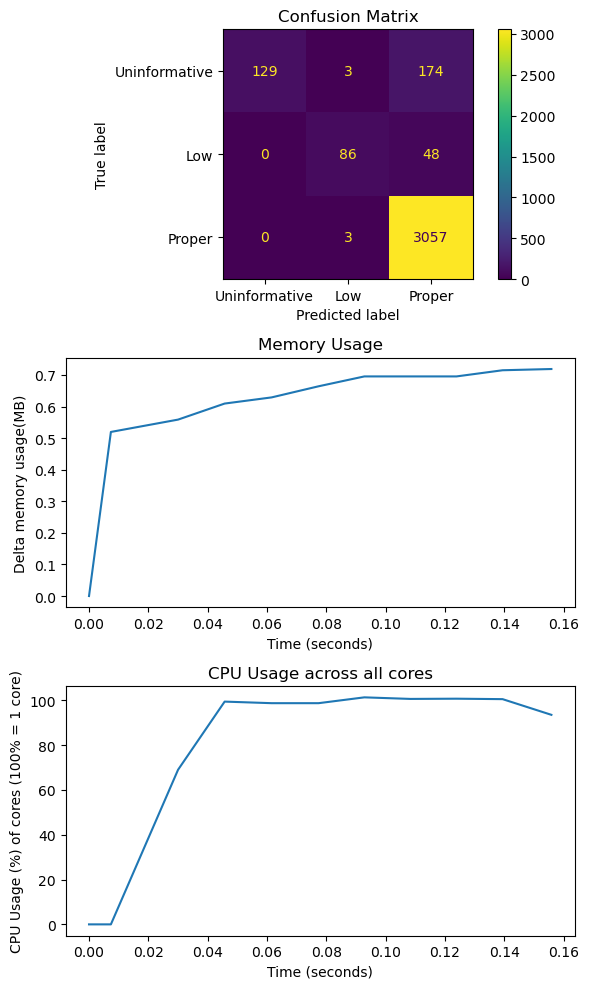

In [7]:
## Evalute model
regex_m_wrapper = ModelEvalWrapper(regex_m, "regex")
m = ModelEvaluator(regex_m_wrapper, dataloader.get_train())

c_report = m.generate_report()
c_report.show_report()


In [3]:
from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator

c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
PMB = BERTBasedModel("models/fine_tuned_BERT_models/PMB_model")
dataloader = AnnotationDataLoader()
PMB.predict(["Unknown function", " ", "Not known", "no data", "\n", "DNA transport protein", "known protein function"])

array([0, 0, 0, 0, 0, 2, 1])

#####	 Report for Model: PubMedBERT	

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        87
           1       0.95      0.95      0.95        39
           2       0.99      0.98      0.99       874

    accuracy                           0.98      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000

The model took 11.75927 seconds to run

Average time per prediction 0.01176 seconds



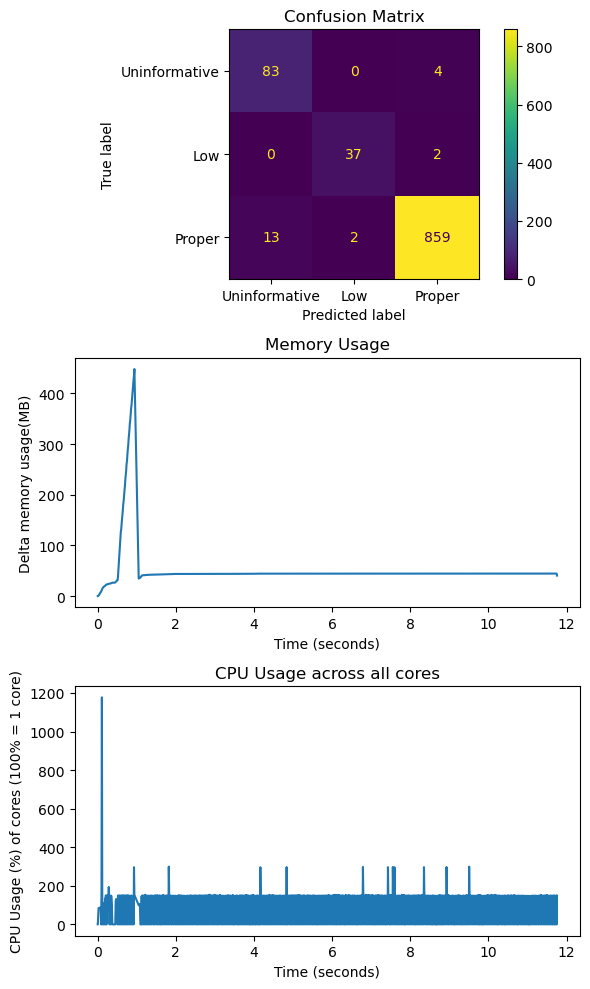

In [8]:
## Evalute model
PMB_m_wrapper = ModelEvalWrapper(PMB, "PubMedBERT")
m = ModelEvaluator(PMB_m_wrapper, dataloader.get_validation())
c_report = m.generate_report()
c_report.show_report()